### Plots of hydrogen investments

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('hydrogen_inv/base_results_hydrogen_production_investments.csv')
df = df[["Node", "Period", "Total capacity [MW]"]]
df

,Node,Period,Total capacity [MW]
0,Austria,2020-2025,0.000058
1,Austria,2025-2030,0.000165
2,Austria,2030-2035,0.000831
3,Austria,2035-2040,0.000832
4,Austria,2040-2045,0.000944
...,...,...,...
283,EnergyhubEU,2035-2040,0.000318
284,EnergyhubEU,2040-2045,0.000779
285,EnergyhubEU,2045-2050,0.000708
286,EnergyhubEU,2050-2055,0.000718


In [6]:
periods = list(df["Period"].unique())
periods

['2020-2025',
 '2025-2030',
 '2030-2035',
 '2035-2040',
 '2040-2045',
 '2045-2050',
 '2050-2055',
 '2055-2060']

In [7]:
nodes_sorted_by_cap = list(df[df["Period"] == "2055-2060"]\
                              .sort_values(by="Total capacity [MW]", ascending=False)["Node"].values)
nodes_sorted_by_cap

['Hungary',
 'CzechR',
 'Poland',
 'Ireland',
 'Romania',
 'Slovakia',
 'Portugal',
 'Bulgaria',
 'Slovenia',
 'NO4',
 'BosniaH',
 'Spain',
 'NO3',
 'Sweden',
 'Lithuania',
 'NO2',
 'NO5',
 'Latvia',
 'NO1',
 'GreatBrit.',
 'Croatia',
 'Finland',
 'Greece',
 'Serbia',
 'Estonia',
 'Denmark',
 'Italy',
 'France',
 'Switzerland',
 'Netherlands',
 'Belgium',
 'Germany',
 'Austria',
 'Luxemb.',
 'Macedonia',
 'EnergyhubEU']

In [9]:
nodes_displayed = nodes_sorted_by_cap

installed_caps = []
for node in nodes_displayed:
    cap_by_period = []
    for period in periods:
        cap_by_period.append(df[(df["Node"] == node) & (df["Period"] == period)]["Total capacity [MW]"].values[0])

    # Remove nodes that have no capacity (1 MW since some threshold)
    if all(c < 1 for c in cap_by_period):
        nodes_displayed.remove(node)
    else:
        installed_caps.append(cap_by_period)
installed_caps 

[[6.157568081379598e-05,
  0.0001905039357416,
  10821.814064328397,
  11004.275518918914,
  42439.81921914501,
  47892.54305604509,
  67745.68668138406,
  67563.22524649517],
 [6.146971431010873e-05,
  0.0001873943025037,
  12888.26567125537,
  12888.265673849204,
  44542.297370947854,
  46581.97213736937,
  67110.38577347557,
  67110.3857639416],
 [6.060199050266653e-05,
  0.0001902257479488,
  20630.186915663617,
  20630.18692194025,
  39515.73972091575,
  39681.561582038776,
  50051.25984410772,
  50051.25984327608],
 [6.233973535005875e-05,
  0.0002096622396218,
  11491.275128764397,
  11491.275130607415,
  32244.83455204009,
  32654.491603973776,
  39143.33769313606,
  39143.33769247164],
 [6.188818379469577e-05,
  0.0001777451299239,
  1561.1097290079774,
  1561.123781918485,
  3839.576240558048,
  3844.527452629576,
  6291.632553341825,
  6291.618496523964],
 [6.124268529171268e-05,
  0.0001859405277503,
  549.114201619218,
  555.5922699381307,
  2162.330916538641,
  2281.92515

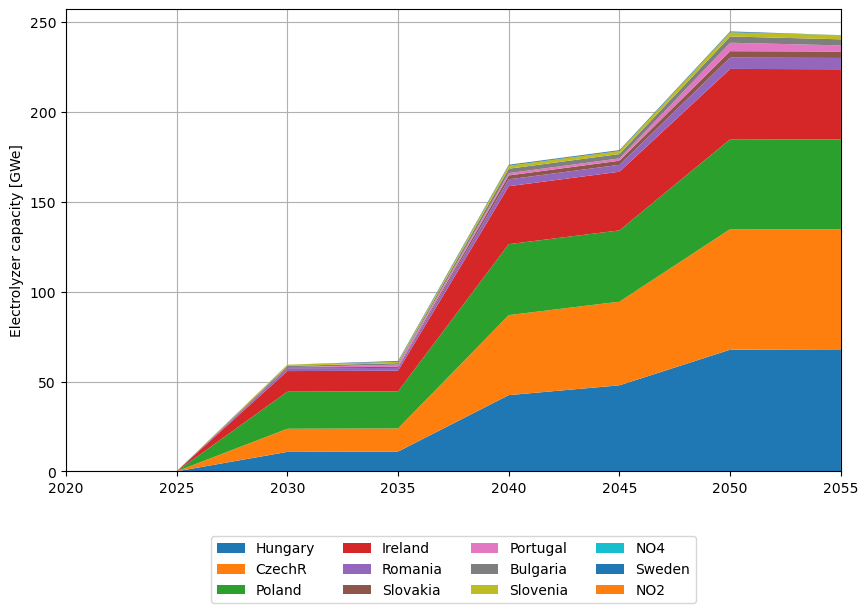

In [11]:
installed_caps_GW = [[cap/1000 for cap in sublist] for sublist in installed_caps]
period_displayed_gen = [period.split("-")[0] for period in periods]

plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(10,6))
plt.rc('axes', axisbelow=True)
plt.grid()
plt.stackplot(period_displayed_gen, installed_caps_GW, labels=nodes_displayed)
plt.ylabel('Electrolyzer capacity [GWe]')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.3), ncol=4)
plt.margins(x=0)
plt.show()